In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR

In [2]:
# Importing data
ds = pd.read_csv('CO2 Emissions_Canada.csv')
ds.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# Renaming columns
ds.rename(columns={'CO2 Emissions(g/km)':'CO2_emission'}, inplace=True)
ds.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_emission
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# Putting different transmission sub-catagories into their respective catagories


ds['Transmission'] = np.where(ds['Transmission'].isin(['A4','A5','A6','A7','A8','A9','A10']),'Automatic',ds['Transmission'])
ds['Transmission'] = np.where(ds['Transmission'].isin(['AS4','AS5','AS6','AS7','AS8','AS9','AS10']),'Automatic of Selective type',ds['Transmission'])
ds['Transmission'] = np.where(ds['Transmission'].isin(['AM5','AM6','AM7','AM8','AM9']),'Automated Manual',ds['Transmission'])
ds['Transmission'] = np.where(ds['Transmission'].isin(['AV','AV6','AV7','AV8','AV10']),'CVT',ds['Transmission'])
ds['Transmission'] = np.where(ds['Transmission'].isin(['M5','M6','M7']),'Manual',ds['Transmission'])

print(ds['Transmission'].unique())

['Automatic of Selective type' 'Manual' 'CVT' 'Automated Manual'
 'Automatic']


In [5]:
# Renaming fuel types for better understanding

print(ds['Fuel Type'].value_counts())

ds['Fuel Type']= np.where(ds['Fuel Type']=='X','Regular gasoline',ds['Fuel Type'])
ds['Fuel Type']= np.where(ds['Fuel Type']=='Z','Premium gasoline',ds['Fuel Type'])
ds['Fuel Type']= np.where(ds['Fuel Type']=='E','Ethanol',ds['Fuel Type'])
ds['Fuel Type']= np.where(ds['Fuel Type']=='D','Diesel',ds['Fuel Type'])
ds['Fuel Type']= np.where(ds['Fuel Type']=='N','Natural gas',ds['Fuel Type'])

print(ds['Fuel Type'].unique())

Fuel Type
X    3637
Z    3202
E     370
D     175
N       1
Name: count, dtype: int64
['Premium gasoline' 'Diesel' 'Regular gasoline' 'Ethanol' 'Natural gas']


# DATA PREPROCESSING

In [6]:
ds['Transmission'].value_counts()

Transmission
Automatic of Selective type    3127
Automatic                      1851
Manual                         1185
Automated Manual                646
CVT                             576
Name: count, dtype: int64

In [7]:
ds['Fuel Type'].value_counts()

Fuel Type
Regular gasoline    3637
Premium gasoline    3202
Ethanol              370
Diesel               175
Natural gas            1
Name: count, dtype: int64

In [8]:
# Dropping natural gas as there is only one data we have which would not make much difference in modelling
ds_N = ds[ds['Fuel Type']== 'Natural gas']
ind = ds_N.index
ds_N

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_emission
2439,CHEVROLET,IMPALA DUAL FUEL,MID-SIZE,3.6,6,Automatic of Selective type,Natural gas,15.2,9.5,12.7,22,213


In [9]:
for i in ind:
    ds.drop(i, axis=0, inplace=True)     

ds[ds['Fuel Type']=='Natural gas']

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_emission


In [10]:
# creating dummy variables of fuel type and transmission (catagorical features)

d_v =pd.get_dummies(ds['Fuel Type'], prefix='Fuel', drop_first=True)
dv = pd.get_dummies(ds["Transmission"], drop_first=True)
d_v.head()


,Fuel_Ethanol,Fuel_Premium gasoline,Fuel_Regular gasoline
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False


In [11]:
dv.head()

,Automatic,Automatic of Selective type,CVT,Manual
0,False,True,False,False
1,False,False,False,True
2,False,False,True,False
3,False,True,False,False
4,False,True,False,False


In [12]:
df = [ds, d_v,dv]

data = pd.concat(df, axis=1)
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_emission,Fuel_Ethanol,Fuel_Premium gasoline,Fuel_Regular gasoline,Automatic,Automatic of Selective type,CVT,Manual
0,ACURA,ILX,COMPACT,2.0,4,Automatic of Selective type,Premium gasoline,9.9,6.7,8.5,33,196,False,True,False,False,True,False,False
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium gasoline,11.2,7.7,9.6,29,221,False,True,False,False,False,False,True
2,ACURA,ILX HYBRID,COMPACT,1.5,4,CVT,Premium gasoline,6.0,5.8,5.9,48,136,False,True,False,False,False,True,False
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic of Selective type,Premium gasoline,12.7,9.1,11.1,25,255,False,True,False,False,True,False,False
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic of Selective type,Premium gasoline,12.1,8.7,10.6,27,244,False,True,False,False,True,False,False


In [13]:
data.drop(['Fuel Type'], inplace=True, axis=1)
data.drop(['Transmission'], inplace=True, axis=1)

In [14]:
#Handling other cat features with mutltiple categories
df_freq = data['Make'].value_counts().to_dict()
mod_freq = data['Model'].value_counts().to_dict()
veh_freq = data['Vehicle Class'].value_counts().to_dict()

In [15]:
data['Make'] = data['Make'].map(df_freq)
data['Model'] = data['Model'].map(mod_freq)
data['Vehicle Class'] = data['Vehicle Class'].map(veh_freq)

In [16]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_emission,Fuel_Ethanol,Fuel_Premium gasoline,Fuel_Regular gasoline,Automatic,Automatic of Selective type,CVT,Manual
0,72,9,1022,2.0,4,9.9,6.7,8.5,33,196,False,True,False,False,True,False,False
1,72,9,1022,2.4,4,11.2,7.7,9.6,29,221,False,True,False,False,False,False,True
2,72,2,1022,1.5,4,6.0,5.8,5.9,48,136,False,True,False,False,False,True,False
3,72,1,1217,3.5,6,12.7,9.1,11.1,25,255,False,True,False,False,True,False,False
4,72,7,1217,3.5,6,12.1,8.7,10.6,27,244,False,True,False,False,True,False,False


In [17]:
#Dividing features and label 
X = data.drop('CO2_emission', axis=1)
y = data['CO2_emission']

In [18]:
X.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel_Ethanol,Fuel_Premium gasoline,Fuel_Regular gasoline,Automatic,Automatic of Selective type,CVT,Manual
0,72,9,1022,2.0,4,9.9,6.7,8.5,33,False,True,False,False,True,False,False
1,72,9,1022,2.4,4,11.2,7.7,9.6,29,False,True,False,False,False,False,True
2,72,2,1022,1.5,4,6.0,5.8,5.9,48,False,True,False,False,False,True,False
3,72,1,1217,3.5,6,12.7,9.1,11.1,25,False,True,False,False,True,False,False
4,72,7,1217,3.5,6,12.1,8.7,10.6,27,False,True,False,False,True,False,False


In [19]:
y.head()

0    196
1    221
2    136
3    255
4    244
Name: CO2_emission, dtype: int64

In [20]:
data.shape

(7384, 17)

In [21]:
# splitting of traing testing set into X and y
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5907, 16)
(1477, 16)
(5907,)
(1477,)


In [23]:
# feature scaling using standardization
scaler =StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train

array([[-0.27521116, -0.68670295, -1.80962504, ..., -0.85157221,
        -0.29299418, -0.44024503],
       [-0.54676246, -0.68670295, -0.42577231, ...,  1.17429853,
        -0.29299418, -0.44024503],
       [ 1.2100082 , -0.87774305, -0.52091218, ...,  1.17429853,
        -0.29299418, -0.44024503],
       ...,
       [ 0.11826113, -0.30462276, -0.14900176, ..., -0.85157221,
         3.4130371 , -0.44024503],
       [-0.27521116, -0.30462276,  1.24061702, ..., -0.85157221,
         3.4130371 , -0.44024503],
       [-1.17299301, -1.06878314, -0.71695798, ..., -0.85157221,
        -0.29299418, -0.44024503]])

In [25]:
data['CO2_emission'].mean()

250.58978873239437

# MODEL IMPLEMENTATION (Approach 1)

# LINEAR REGRESSION

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
model.intercept_

250.98357880480785

In [28]:
model.coef_

array([  0.09846243,  -0.09126632,  -0.03196586,   0.25410999,
         2.17469937,  24.28719842,  13.07132844,  20.53745833,
        -6.35439345, -30.19620392, -15.35456651, -15.09009955,
        -0.35425518,  -0.32284677,  -0.17696755,  -0.3645601 ])

In [29]:
y_pred = model.predict(X_test)
y_pred

array([359.06209907, 292.97346311, 377.59960241, ..., 341.77783102,
       193.05390931, 177.97061893])

In [30]:
np.sqrt(mean_squared_error(y_test, y_pred))

4.918260935039374

In [31]:
r2_score(y_test, y_pred)

0.993041824997087

In [32]:
frames = [y_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T

In [33]:
lin_pred = result_pred.rename(columns={0: 'pred_values',1:'real_values'})
lin_pred['pred_values'] = lin_pred['pred_values'].map(lambda x: round(x,2))

lin_pred

,pred_values,real_values
0,359.06,368.0
1,292.97,290.0
2,377.60,382.0
3,210.80,211.0
4,192.94,193.0
...,...,...
1472,233.49,235.0
1473,262.28,263.0
1474,341.78,346.0
1475,193.05,193.0


In [34]:
lin_pred['diff'] = abs(lin_pred['pred_values'] - lin_pred['real_values'])

print('mean diff: ', (abs(lin_pred['diff']).mean()))

mean diff:  2.9790589031821257


In [35]:
lin_pred.head(10)

,pred_values,real_values,diff
0,359.06,368.0,8.94
1,292.97,290.0,2.97
2,377.60,382.0,4.40
3,210.80,211.0,0.20
4,192.94,193.0,0.06
5,249.45,244.0,5.45
6,213.25,210.0,3.25
7,174.25,174.0,0.25
8,266.72,268.0,1.28
9,303.68,305.0,1.32


/var/folders/9q/v9lg91hs2pv8gpm610xypn3h0000gq/T/ipykernel_89271/3524681940.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred-y_test)


<Axes: xlabel='CO2_emission', ylabel='Density'>

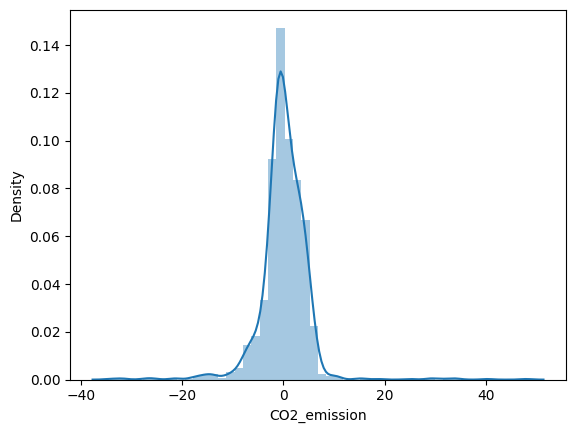

In [36]:
sns.distplot(y_pred-y_test)

Text(0, 0.5, 'y_pred')

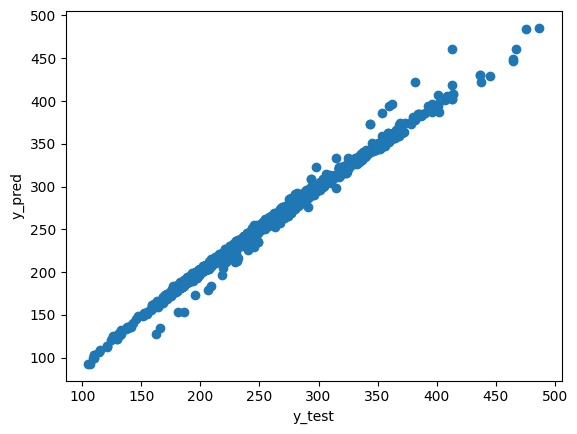

In [37]:
plt.scatter( y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

/var/folders/9q/v9lg91hs2pv8gpm610xypn3h0000gq/T/ipykernel_89271/1049869358.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, bins=20,color='red')


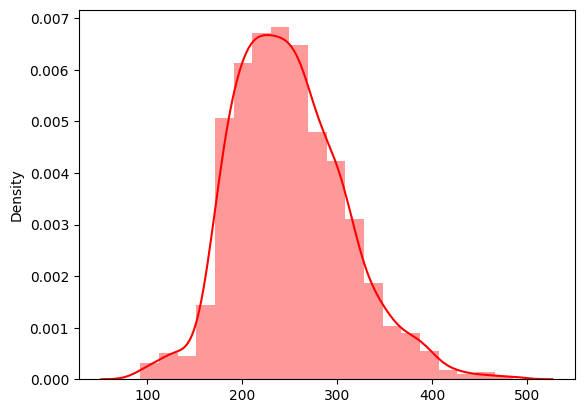

/var/folders/9q/v9lg91hs2pv8gpm610xypn3h0000gq/T/ipykernel_89271/1049869358.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CO2_emission'], bins=20)


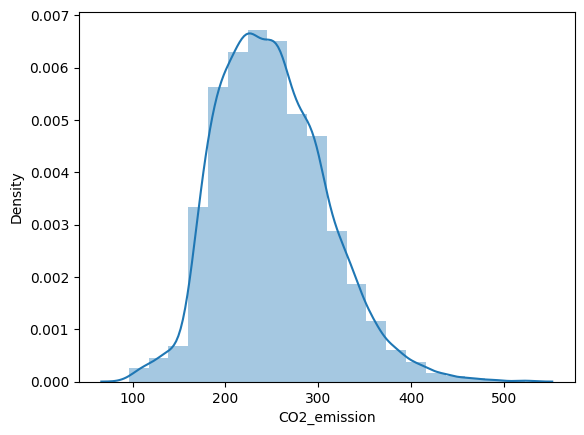

In [38]:
sns.distplot(y_pred, bins=20,color='red')
plt.show()
sns.distplot(data['CO2_emission'], bins=20)
plt.show()

# LASSO REGRESSION

In [39]:
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [40]:
model.coef_

array([ 4.10688699e-02, -3.23723948e-02, -3.10957933e-02,  2.68895563e-01,
        2.36357321e+00,  3.30421624e+01,  1.77015362e+01,  6.80605134e+00,
       -6.32948570e+00, -2.86969037e+01, -1.24701105e+01, -1.23090508e+01,
        0.00000000e+00,  0.00000000e+00, -3.51753527e-02, -1.06025946e-01])

In [41]:
y_lasso_pred = model.predict(X_test)
y_lasso_pred

array([358.79551397, 292.86661453, 376.81200979, ..., 341.30500647,
       193.12483782, 178.01787383])

In [42]:
np.sqrt(mean_squared_error(y_test,y_lasso_pred ))

5.010845670292353

In [43]:
r2_score(y_lasso_pred, y_test)

0.992737024955327

In [44]:
frames = [y_lasso_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred

,0,1
0,358.795514,368.0
1,292.866615,290.0
2,376.812010,382.0
3,211.392782,211.0
4,193.370708,193.0
...,...,...
1472,233.454870,235.0
1473,262.261074,263.0
1474,341.305006,346.0
1475,193.124838,193.0


In [45]:
lasso_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
lasso_pred['pred_values'] = (lasso_pred['pred_values'].map(lambda x: round(x,2)))

lasso_pred['diff'] = abs(lasso_pred['real_values'] -lasso_pred['pred_values'])


print('mean diff: ', abs(lasso_pred['diff']).mean())

mean diff:  3.0695125253893027


In [46]:
lasso_pred.head(10)

,pred_values,real_values,diff
0,358.80,368.0,9.20
1,292.87,290.0,2.87
2,376.81,382.0,5.19
3,211.39,211.0,0.39
4,193.37,193.0,0.37
5,249.53,244.0,5.53
6,213.50,210.0,3.50
7,174.49,174.0,0.49
8,266.69,268.0,1.31
9,303.63,305.0,1.37


/var/folders/9q/v9lg91hs2pv8gpm610xypn3h0000gq/T/ipykernel_89271/287112299.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_lasso_pred-y_test)


<Axes: xlabel='CO2_emission', ylabel='Density'>

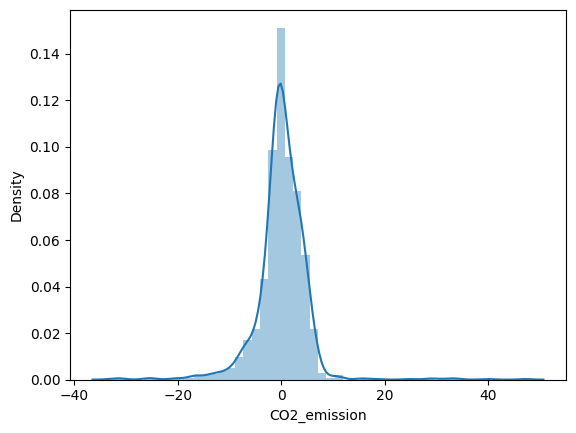

In [47]:
sns.distplot(y_lasso_pred-y_test)

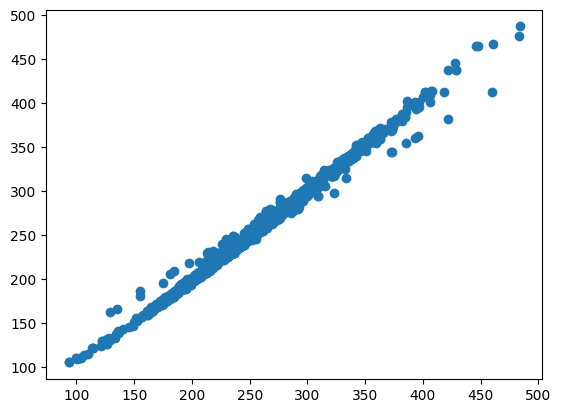

In [48]:
plt.scatter(y_lasso_pred, y_test)

/var/folders/9q/v9lg91hs2pv8gpm610xypn3h0000gq/T/ipykernel_89271/3096459366.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_lasso_pred, bins=20,color='red')


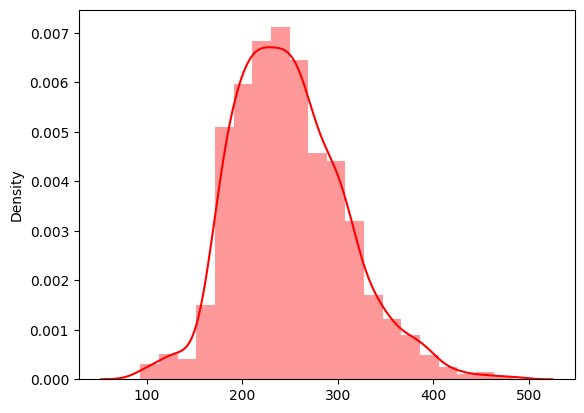

/var/folders/9q/v9lg91hs2pv8gpm610xypn3h0000gq/T/ipykernel_89271/3096459366.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CO2_emission'], bins=20)


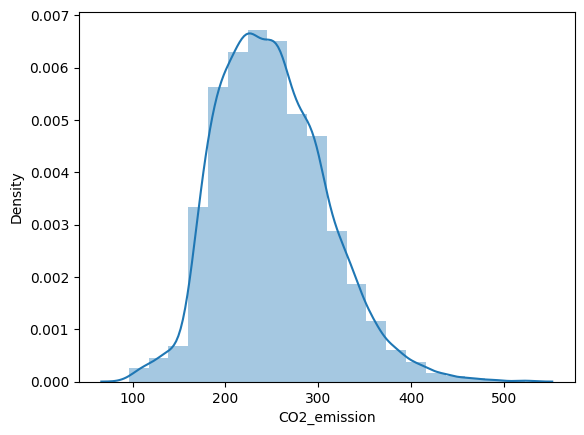

In [49]:
sns.distplot(y_lasso_pred, bins=20,color='red')
plt.show()
sns.distplot(data['CO2_emission'], bins=20)
plt.show()

# RIDGE REGRESSION

In [50]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [51]:
model.intercept_

250.98357880480785

In [52]:
model.coef_

array([  0.0984104 ,  -0.09161414,  -0.03223331,   0.25580399,
         2.17649331,  24.2725577 ,  13.06941374,  20.54613454,
        -6.35749929, -30.18992822, -15.34561823, -15.08115297,
        -0.35389225,  -0.32251485,  -0.17744887,  -0.3643426 ])

In [53]:
y_ridge = model.predict(X_test)
y_ridge

array([359.0601953 , 292.97099692, 377.58926686, ..., 341.77795347,
       193.05354166, 177.97161533])

In [54]:
np.sqrt(mean_squared_error(y_ridge,y_test))

4.918236521330608

In [55]:
r2_score(y_test,y_ridge)

0.9930418940761533

In [56]:
frames = [y_ridge, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred

,0,1
0,359.060195,368.0
1,292.970997,290.0
2,377.589267,382.0
3,210.799654,211.0
4,192.941632,193.0
...,...,...
1472,233.492012,235.0
1473,262.283370,263.0
1474,341.777953,346.0
1475,193.053542,193.0


In [57]:
ridge_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
ridge_pred['pred_values'] = (ridge_pred['pred_values'].map(lambda x: round(x,2)))

ridge_pred['diff'] = abs(ridge_pred['real_values'] -ridge_pred['pred_values'])


print('mean diff: ', abs(ridge_pred['diff']).mean())

mean diff:  2.9794245091401494


In [58]:
ridge_pred.head(10)

,pred_values,real_values,diff
0,359.06,368.0,8.94
1,292.97,290.0,2.97
2,377.59,382.0,4.41
3,210.80,211.0,0.20
4,192.94,193.0,0.06
5,249.45,244.0,5.45
6,213.25,210.0,3.25
7,174.25,174.0,0.25
8,266.72,268.0,1.28
9,303.68,305.0,1.32


/var/folders/9q/v9lg91hs2pv8gpm610xypn3h0000gq/T/ipykernel_89271/2207294210.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_ridge)


<Axes: xlabel='CO2_emission', ylabel='Density'>

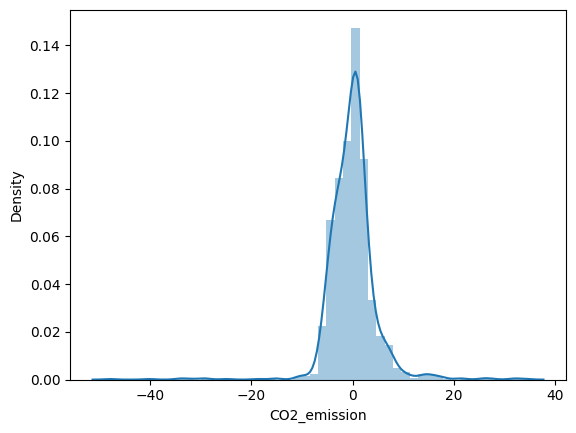

In [59]:
sns.distplot(y_test-y_ridge)

/var/folders/9q/v9lg91hs2pv8gpm610xypn3h0000gq/T/ipykernel_89271/2234844848.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_ridge, bins=20,color='red')


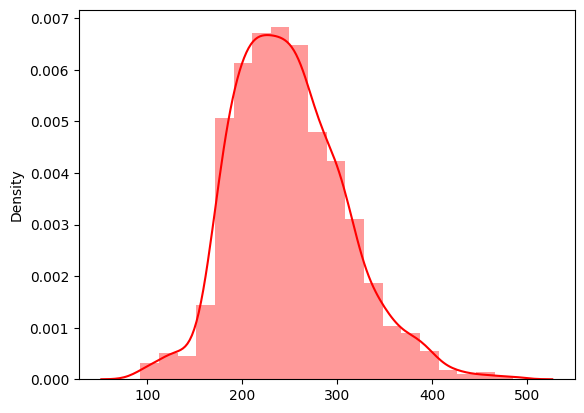

/var/folders/9q/v9lg91hs2pv8gpm610xypn3h0000gq/T/ipykernel_89271/2234844848.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CO2_emission'], bins=20)


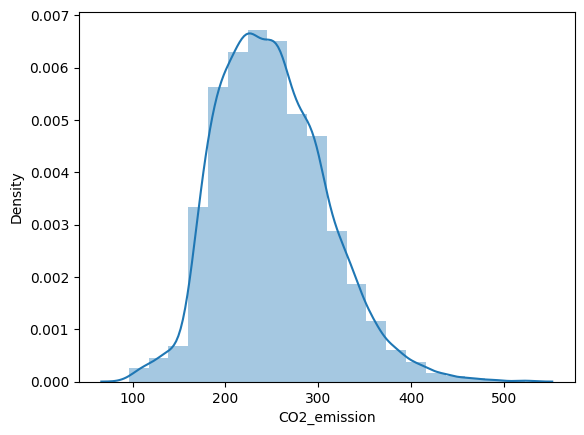

In [60]:
sns.distplot(y_ridge, bins=20,color='red')
plt.show()
sns.distplot(data['CO2_emission'], bins=20)
plt.show()

# DECISION TREE REGRESSION

In [61]:
model = DecisionTreeRegressor(random_state = 42)

model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [62]:
dtr_pred = model.predict(X_test)
dtr_pred

array([357.        , 290.        , 382.        , ..., 342.66666667,
       193.        , 177.        ])

In [63]:
np.sqrt(mean_squared_error(y_test,dtr_pred ))

3.629475553464912

In [64]:
r2_score(y_test, dtr_pred)

0.9962106914830545

In [65]:
dtr_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
dtr_pred['pred_values'] = (dtr_pred['pred_values'].map(lambda x: round(x,2)))

dtr_pred['diff'] = abs(dtr_pred['real_values'] -dtr_pred['pred_values'])


print('mean diff: ', abs(dtr_pred['diff']).mean())

mean diff:  2.9794245091401494


In [66]:
dtr_pred.head(10)

,pred_values,real_values,diff
0,359.06,368.0,8.94
1,292.97,290.0,2.97
2,377.59,382.0,4.41
3,210.80,211.0,0.20
4,192.94,193.0,0.06
5,249.45,244.0,5.45
6,213.25,210.0,3.25
7,174.25,174.0,0.25
8,266.72,268.0,1.28
9,303.68,305.0,1.32


# RANDOM FOREST

In [67]:

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [68]:
y_rf_pred = rf_model.predict(X_test)
y_rf_pred

array([358.89      , 290.445     , 384.095     , ..., 343.96638095,
       190.4       , 177.43833333])

In [69]:
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(y_test,y_rf_pred))))
print('MAE: {:0.4f}'.format(mean_absolute_error(y_test,y_rf_pred)))
print('R2_score: {:0.4f}'.format(r2_score(y_test,y_rf_pred)))

RMSE: 3.1842
MAE: 1.9533
R2_score: 0.9971


In [70]:
y_rf_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
y_rf_pred['pred_values'] = (y_rf_pred['pred_values'].map(lambda x: round(x,2)))

y_rf_pred['diff'] = abs(y_rf_pred['real_values'] -y_rf_pred['pred_values'])


print('mean diff: ', abs(y_rf_pred['diff']).mean())

mean diff:  2.9794245091401494


In [71]:
y_rf_pred.head(10)

,pred_values,real_values,diff
0,359.06,368.0,8.94
1,292.97,290.0,2.97
2,377.59,382.0,4.41
3,210.80,211.0,0.20
4,192.94,193.0,0.06
5,249.45,244.0,5.45
6,213.25,210.0,3.25
7,174.25,174.0,0.25
8,266.72,268.0,1.28
9,303.68,305.0,1.32


# SIMPLE VECTOR MACHINE

In [72]:
model = LinearSVR()
model.fit(X_train, y_train)
y_svr_pred = model.predict(X_test)
y_svr_pred

/Users/sara/miniconda3/envs/explingo/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


array([363.60064055, 294.17164487, 383.37966618, ..., 344.86670976,
       191.75678325, 176.98603984])

In [73]:
np.sqrt(mean_squared_error(y_svr_pred,y_test))

5.439924040726243

In [74]:
r2_score(y_svr_pred,y_test)

0.9918328072823788

In [75]:
frames = [y_svr_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

,0,1
0,363.600641,368.0
1,294.171645,290.0
2,383.379666,382.0
3,210.636297,211.0
4,192.427501,193.0


In [76]:
y_svr_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
y_svr_pred['pred_values'] = (y_svr_pred['pred_values'].map(lambda x: round(x,2)))

y_svr_pred['diff'] = abs(y_svr_pred['real_values'] -y_svr_pred['pred_values'])


print('mean diff: ', abs(y_svr_pred['diff']).mean())

mean diff:  2.80490182802979


In [77]:
y_svr_pred.head(10)

,pred_values,real_values,diff
0,363.60,368.0,4.40
1,294.17,290.0,4.17
2,383.38,382.0,1.38
3,210.64,211.0,0.36
4,192.43,193.0,0.57
5,248.72,244.0,4.72
6,211.01,210.0,1.01
7,174.27,174.0,0.27
8,266.68,268.0,1.32
9,304.34,305.0,0.66


#  APPROACH 2

In [78]:
models =['LinReg','LasReg','RidReg','DT', 'RF',"SVR"]

frame = pd.DataFrame(columns={'models':[],'rmse_train':[], 'mae_train':[],'r2_train':[] ,'rmse_test':[], 'mae_test':[],'r2_test':[]})




for i in range(len(models)):
    if models[i] == 'LinReg':
        model = LinearRegression()
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Linear Regression', rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    elif models[i] =='LasReg':
        model = Lasso(alpha=0.1)
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Lasso Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    elif models[i] =='RidReg':
        model = Ridge(alpha=0.1)
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Ridge Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    elif models[i] =='DT':
        model = DecisionTreeRegressor()
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Decision Tree Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    elif models[i] =='RF':
        model = RandomForestRegressor()
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
       
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Random Forest Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    else :
        models[i] =='SVM'
        model = LinearSVR()
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Simple Vector Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]

/Users/sara/miniconda3/envs/explingo/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


OVERALL PERFORMANCE OF ALL MODELS IN A DATAFRAME

In [79]:
frame

,models,rmse_train,mae_train,r2_train,rmse_test,mae_test,r2_test
0,Linear Regression,4.962163,2.996013,0.992778,4.918261,2.979052,0.993042
1,Lasso Regression,5.044863,3.063387,0.992535,5.010846,3.069379,0.992777
2,Ridge Regression,4.962164,2.996319,0.992778,4.918237,2.979438,0.993042
3,Decision Tree Regression,0.939813,0.318859,0.999741,3.777605,1.824577,0.995895
4,Random Forest Regression,1.487588,0.874027,0.999351,3.171092,1.965094,0.997107
5,Simple Vector Regression,5.349048,2.713799,0.991608,5.435251,2.804626,0.991502
